In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv'

In [3]:
!wget $data

--2025-07-03 05:24:47--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.1’

data.csv.1          100%[===================>]   1.41M  8.97MB/s    in 0.2s    

2025-07-03 05:24:48 (8.97 MB/s) - ‘data.csv.1’ saved [1475504/1475504]



In [4]:
df = pd.read_csv('data.csv')

In [5]:
df.sample(n = 5, axis = 0)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
10839,Mazda,Truck,2003,regular unleaded,147.0,6.0,MANUAL,rear wheel drive,2.0,NaN,Compact,Regular Cab Pickup,21,17,586,16975
5693,HUMMER,H3,2008,regular unleaded,242.0,5.0,MANUAL,four wheel drive,4.0,Luxury,Midsize,4dr SUV,18,13,130,30995
2397,Volkswagen,CC,2015,premium unleaded (recommended),200.0,4.0,MANUAL,front wheel drive,4.0,Performance,Midsize,Sedan,32,21,873,32995
7125,Mazda,MX-5 Miata,2016,premium unleaded (recommended),155.0,4.0,AUTOMATIC,rear wheel drive,2.0,Performance,Compact,Convertible,36,27,586,31270
182,Mercedes-Benz,300-Class,1992,diesel,148.0,6.0,AUTOMATIC,rear wheel drive,4.0,"Diesel,Luxury",Large,Sedan,22,18,617,2547


In [6]:
df.sample(n = 5, axis = 1)

,Vehicle Size,Make,Vehicle Style,Number of Doors,highway MPG
0,Compact,BMW,Coupe,2.0,26
1,Compact,BMW,Convertible,2.0,28
2,Compact,BMW,Coupe,2.0,28
3,Compact,BMW,Coupe,2.0,28
4,Compact,BMW,Convertible,2.0,28
...,...,...,...,...,...
11909,Midsize,Acura,4dr Hatchback,4.0,23
11910,Midsize,Acura,4dr Hatchback,4.0,23
11911,Midsize,Acura,4dr Hatchback,4.0,23
11912,Midsize,Acura,4dr Hatchback,4.0,23


In [7]:
df.columns


Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [8]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11884 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11908 non-null  float64
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  int64  
dtypes: float64(3), int64(5

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,11914.0,2010.384338,7.579740,1990.0,2007.0,2015.0,2016.00,2017.0
engine_hp,11845.0,249.386070,109.191870,55.0,170.0,227.0,300.00,1001.0
engine_cylinders,11884.0,5.628829,1.780559,0.0,4.0,6.0,6.00,16.0
number_of_doors,11908.0,3.436093,0.881315,2.0,2.0,4.0,4.00,4.0
highway_mpg,11914.0,26.637485,8.863001,12.0,22.0,26.0,30.00,354.0
city_mpg,11914.0,19.733255,8.987798,7.0,16.0,18.0,22.00,137.0
popularity,11914.0,1554.911197,1441.855347,2.0,549.0,1385.0,2009.00,5657.0
msrp,11914.0,40594.737032,60109.103604,2000.0,21000.0,29995.0,42231.25,2065902.0


In [11]:
categorical_columns = list(df.columns[df.dtypes == "object"])

In [12]:
for col in categorical_columns:
    df[col] = df[col].str.lower().str.replace(" ", "_")

In [13]:
df['make']

0            bmw
1            bmw
2            bmw
3            bmw
4            bmw
          ...   
11909      acura
11910      acura
11911      acura
11912      acura
11913    lincoln
Name: make, Length: 11914, dtype: object

In [14]:
#replacing na by zero for now
print(df.isnull().sum())

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64


In [15]:
list = []
null_list = df.isnull().sum()
for col, count in null_list.items():
    if count != 0:
        list.append(col)
        print(col)
    
    
    

engine_fuel_type
engine_hp
engine_cylinders
number_of_doors
market_category


In [16]:
df[list] = df[list].fillna(0)
df.isnull().sum()

make                 0
model                0
year                 0
engine_fuel_type     0
engine_hp            0
engine_cylinders     0
transmission_type    0
driven_wheels        0
number_of_doors      0
market_category      0
vehicle_size         0
vehicle_style        0
highway_mpg          0
city_mpg             0
popularity           0
msrp                 0
dtype: int64

In [17]:
#data exploration for glimpse
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print(df[col].sample(n = 5))
    print()
    print()
  

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48
10875         acura
2834       plymouth
1229          honda
10421    volkswagen
6211          dodge
Name: make, dtype: object


model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914
7790         q50
10780       trax
7727     protege
5603          gt
1116          a6
Name: model, dtype: object


year
[2011 2012 2013 1992 1993]
28
2983    2015
2171    2015
8750    2002
4187    2010
6671    2015
Name: year, dtype: int64


engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
11
6316       premium_unleaded_(required)
6089                            diesel
6730    premium_unleaded_(recommended)
7709                  regular_unleaded
2135                  regular_unleaded
Name: engine_fuel_type, dtype: object


engine_hp
[335. 300. 230. 320. 172.]
357
3649     200.0
11199    165.0
2188     275.0
11605    240.0
1499     272.0
Name: engine_hp

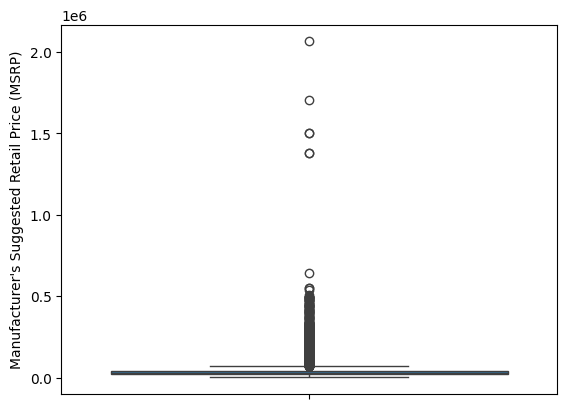

In [18]:
sns.boxplot(df.msrp)
#plt.figure(figsize = (4,4))
plt.ylabel("Manufacturer's Suggested Retail Price (MSRP)")
plt.show()


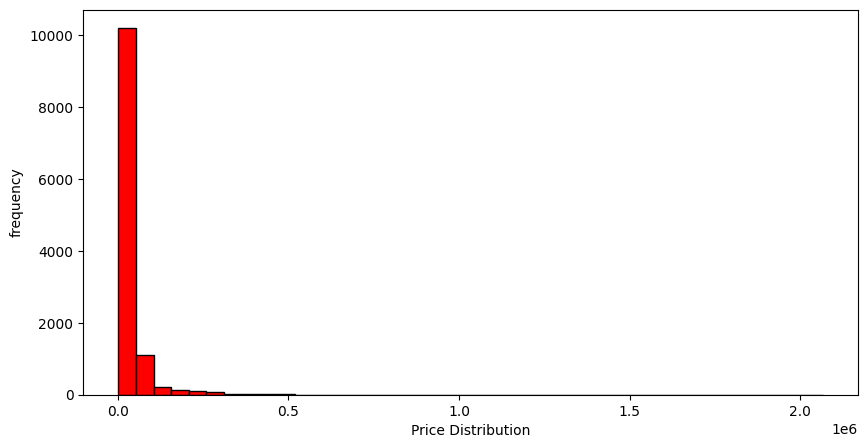

In [19]:
plt.figure(figsize = (10,5))
sns.histplot(df.msrp, bins = 40, color = 'red', alpha = 1)
plt.ylabel('frequency')
plt.xlabel('Price Distribution')
plt.show()

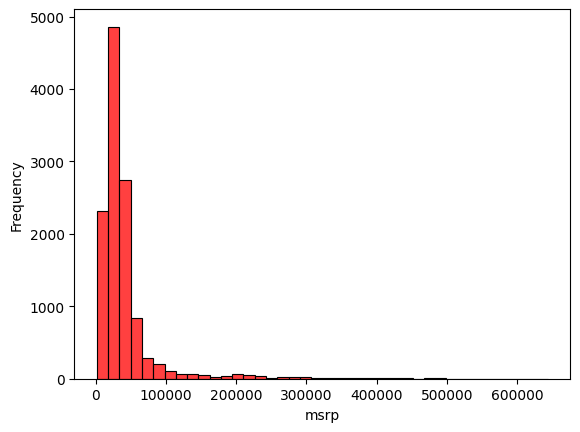

In [20]:
sns.histplot(df.msrp[df.msrp<= 1000000], bins = 40, color = 'red')
#plt.figure(figsize = (4,6))
plt.ylabel("Frequency")
plt.show()


In [69]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

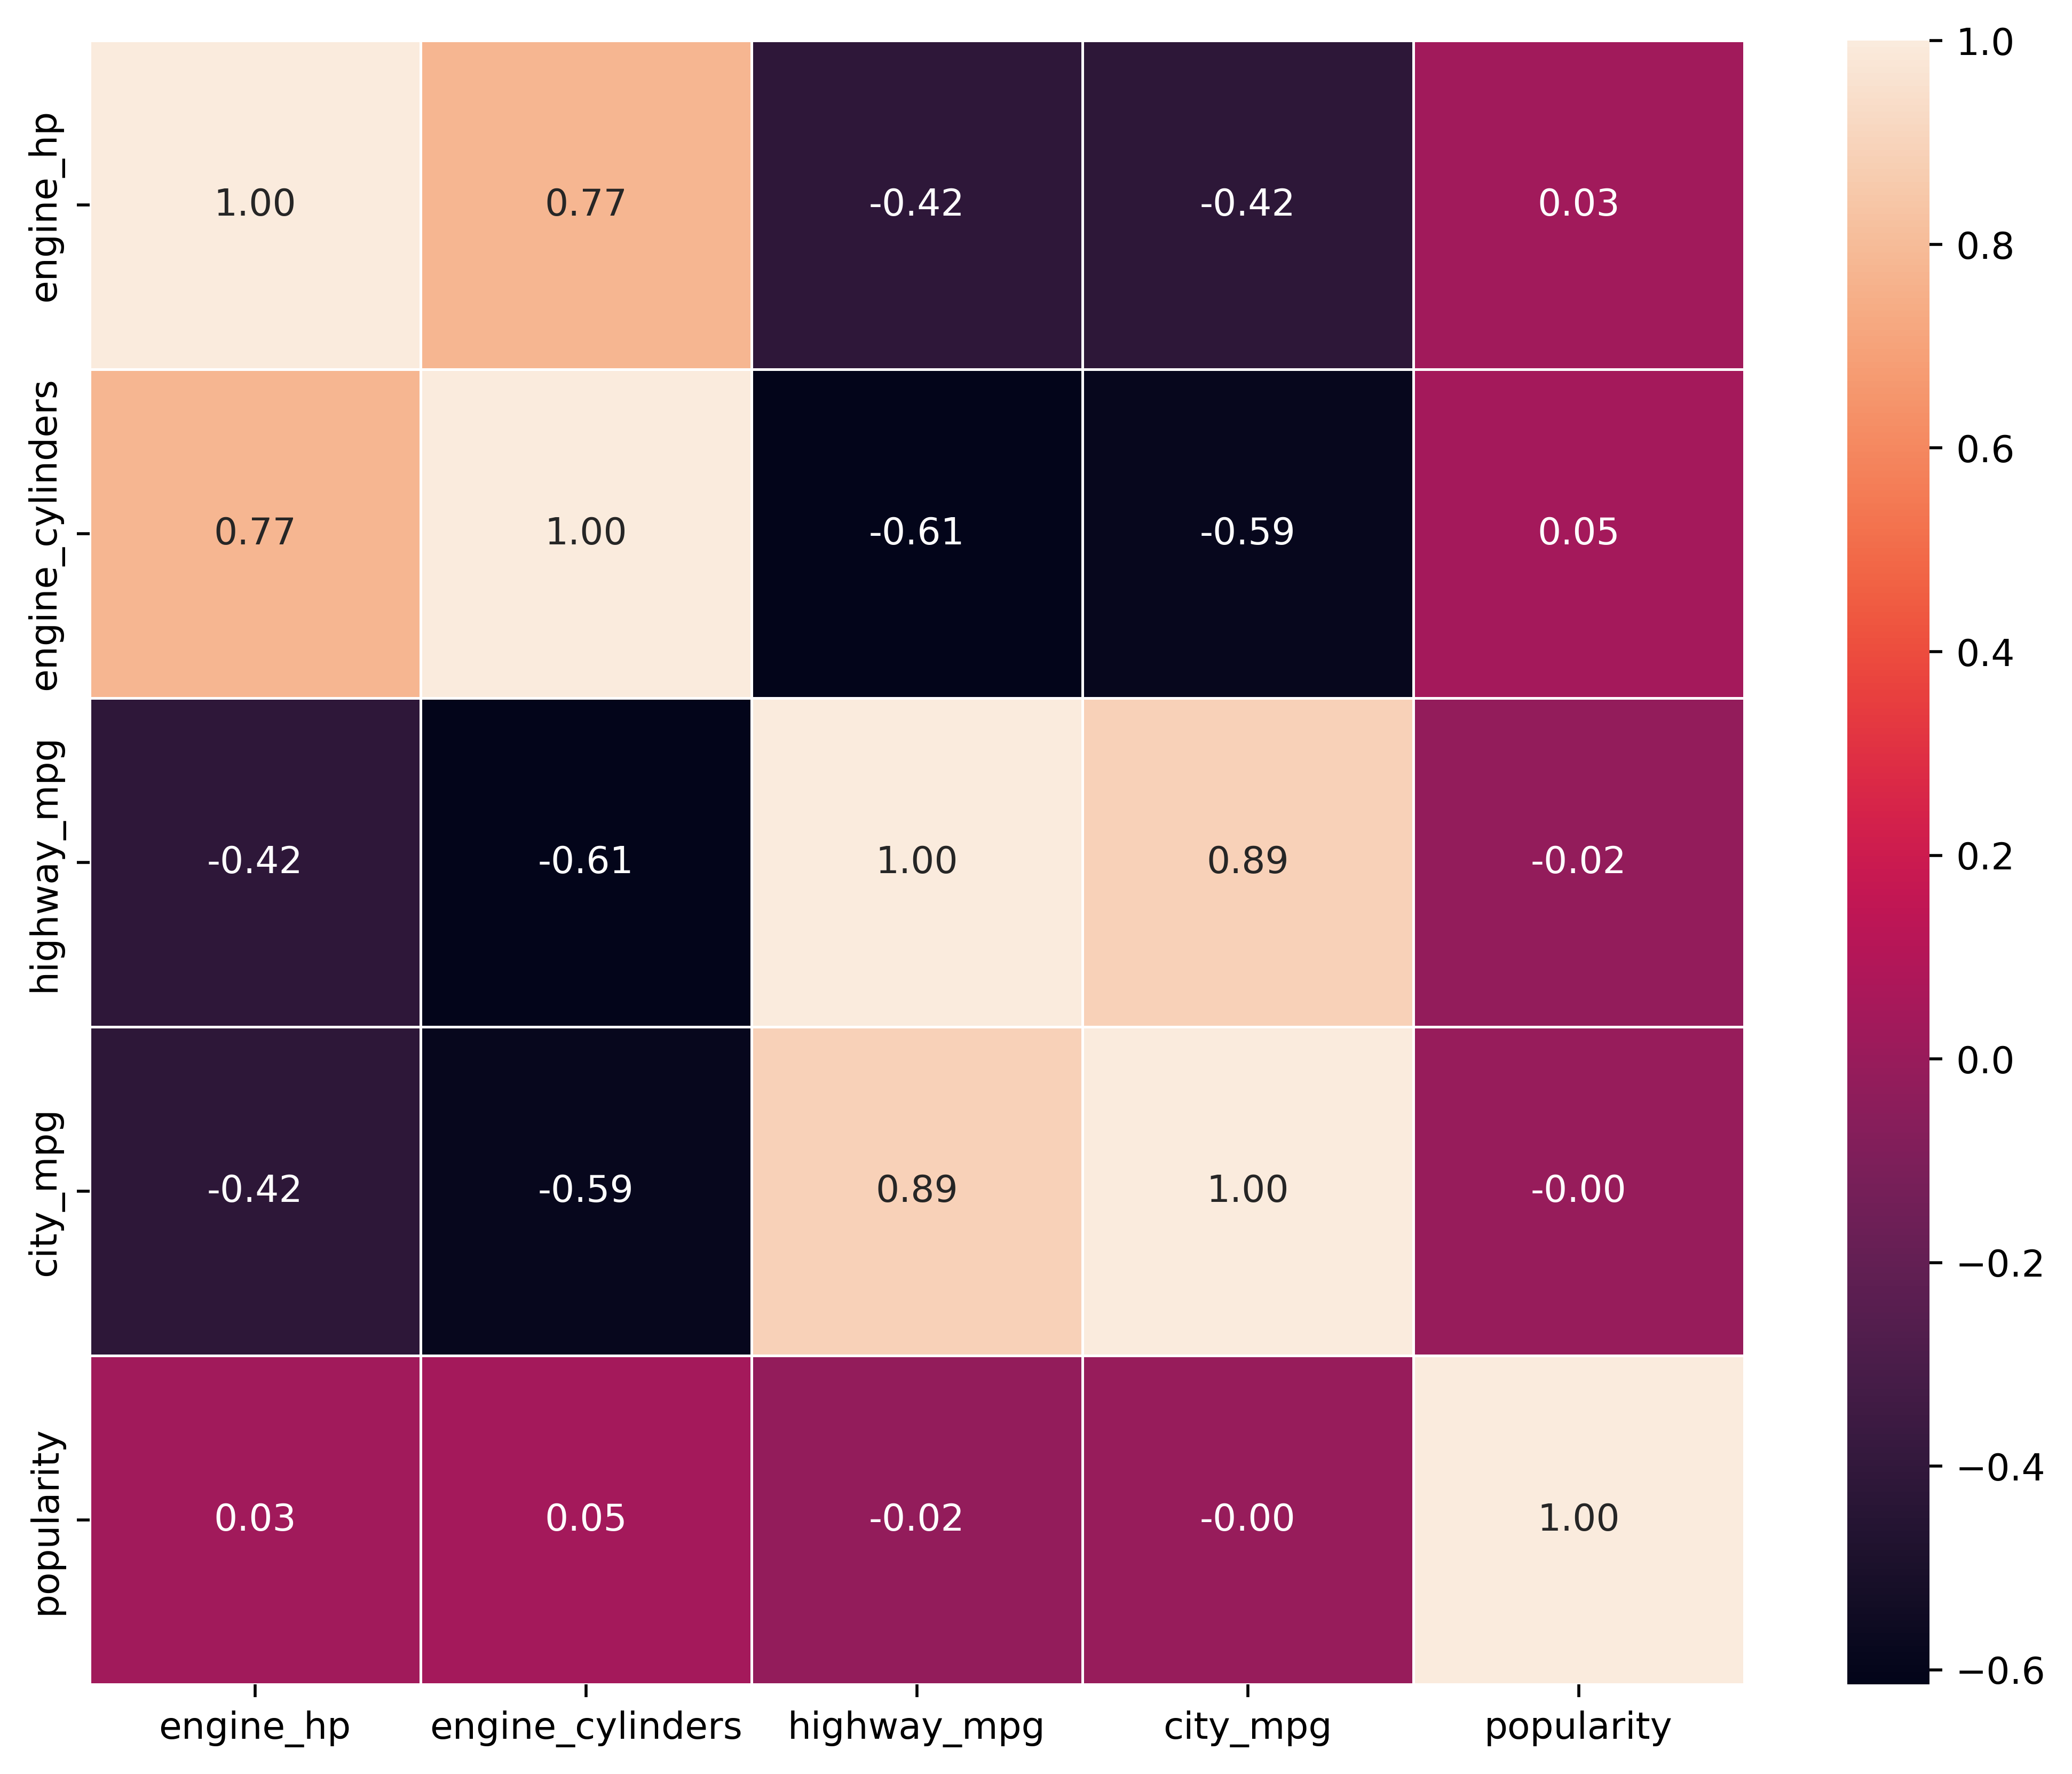

In [72]:
cor_df = df[base].corr()
plt.figure(figsize = (10,8), dpi = 500)
sns.heatmap(cor_df, annot = True, fmt = ".2f", linewidth = .5)
plt.show()

In [73]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [115]:
def prepare_X(df):
    df_num = df[base]
    #df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [105]:
idx = len(df)
idx = np.arange(idx)
np.random.shuffle(idx)
test_len = int(0.2 * len(df))
val_len = int(0.2 * len(df))
train_len = len(df) - (test_len + val_len)

#using idx to shuffle the data
val_idx = idx[: val_len]
test_idx = idx[val_len : val_len + test_len]
train_idx = idx[val_len + test_len :]

df_val = df.iloc[val_idx, :]
df_test = df.iloc[test_idx, :]
df_train = df.iloc[train_idx, :]

print(len(df_val), len(df_test), len(df_train))

2382 2382 7150


In [129]:
#preparing y label
y_train_orig = df_train .msrp.values
y_val_orig = df_val.msrp.values
y_test_orig = df_test.msrp.values

#converted values in log for normal distribution
y_train = np.log1p(y_train_orig)
y_val = np.log1p(y_val_orig)
y_test = np.log1p(y_test_orig)

#removing of the true label in the train data to prevent using it in the train data 
del df_train["msrp"]
del df_val["msrp"]
del df_test["msrp"]

print(df_train.columns)

print(len(y_train))

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')
7150


In [112]:
(2382 + 2382 + 7150) == len(df)

True

In [110]:
df_val.sample(n = 5, axis = 0)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
7900,maserati,quattroporte,2017,premium_unleaded_(required),523.0,8.0,automatic,rear_wheel_drive,4.0,"exotic,factory_tuner,luxury,high-performance",large,sedan,22,15,238,145500
4103,cadillac,escalade_esv,2015,flex-fuel_(unleaded/e85),420.0,8.0,automatic,four_wheel_drive,4.0,"flex_fuel,luxury",large,4dr_suv,20,14,1624,77295
3850,hyundai,elantra_touring,2011,regular_unleaded,138.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,30,23,1439,17195
4850,subaru,forester,2017,premium_unleaded_(required),250.0,4.0,automatic,all_wheel_drive,4.0,crossover,midsize,4dr_suv,27,23,640,34295
1185,hyundai,accent,2016,regular_unleaded,137.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,26,1439,16195


In [114]:
df_test.sample(n = 5, axis = 0)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
4414,mitsubishi,expo,1993,regular_unleaded,136.0,4.0,manual,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,26,19,436,2000
8379,toyota,rav4_hybrid,2017,regular_unleaded,194.0,4.0,automatic,all_wheel_drive,4.0,"crossover,hybrid",midsize,4dr_suv,30,34,2031,29030
10829,mazda,tribute,2011,regular_unleaded,171.0,4.0,automatic,all_wheel_drive,4.0,crossover,compact,4dr_suv,26,20,586,27455
2810,chevrolet,colorado,2016,regular_unleaded,305.0,6.0,automatic,rear_wheel_drive,4.0,diesel,compact,crew_cab_pickup,26,18,1385,29440
11208,aston_martin,vanquish,2015,premium_unleaded_(required),568.0,12.0,automatic,rear_wheel_drive,2.0,"exotic,high-performance",midsize,convertible,21,13,259,301695


In [123]:
X_train = prepare_X(df)

In [130]:
X_train.shape

(7150, 5)

In [131]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [132]:
#implementing linear regression 
y_pred = w_0 + X_train.dot(w)

In [135]:
y_pred[50: 55]

array([ 9.72968254, 10.39291203,  9.33631511, 10.83132934, 12.42739113])

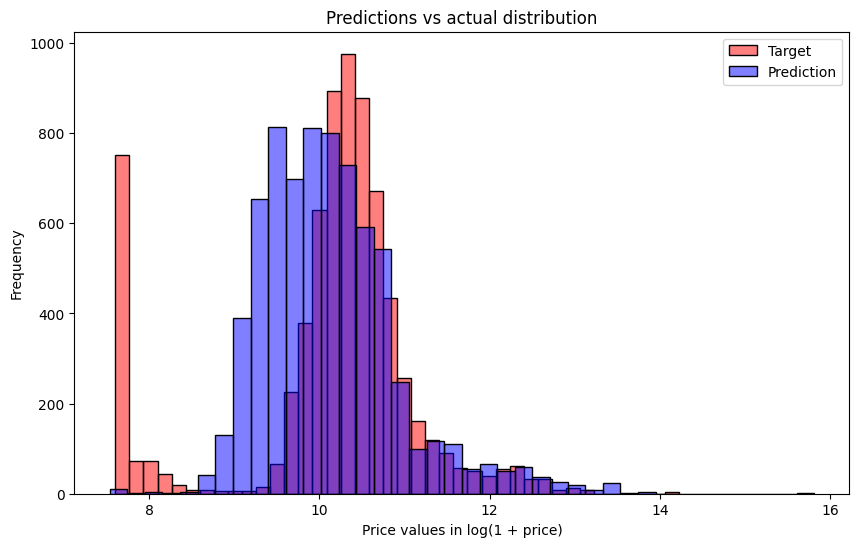

In [147]:
#plotting both label to compare their prediction
plt.figure(figsize = (10, 6))
sns.histplot(y_train, color = "red", label = "Target", bins = 40, alpha = 0.5)
sns.histplot(y_pred, color = "blue", label = "Prediction", bins = 40, alpha = 0.5 )
plt.legend()
plt.ylabel("Frequency")
plt.xlabel("Price values in log(1 + price)")
plt.title('Predictions vs actual distribution')

plt.show()

In [155]:
def rmse (y, y_pred):
    #n = len(y_pred)
    error = y - y_pred
    #mse = (error **2) / n
    mse = (error **2).mean()
    return np.sqrt(mse)

In [156]:
rmse(y_train, y_pred)

np.float64(0.7575341882727148)

In [175]:
#checking the modal performance in the validation data sets 
xval = prepare_X(df_val)
y_pred = w_0 + xval.dot(w)

In [176]:
rmse(y_val, y_pred)

np.float64(0.7417017359875381)

In [179]:
def prepare_X(df):
    df + df.copy()
    features = base.copy()
    df["age"] = 2017 - df.year
    features.append("age")
    df_n = df[features]
    df_n = df_n.fillna(0)
    x = df_n.values
    return x
    

In [197]:
x_train = prepare_X(df_train)

w_0, w = train_linear_regression(x_train, y_train)

y_pred = w_0 + x_train.dot(w)
print("train", rmse(y_train, y_pred))

x_val = prepare_X(df_val)
y_vp = w_0 + x_val.dot(w)
print("val", rmse(y_val, y_vp))

train 0.5177809058542403
val 0.5185151198767786


/tmp/ipykernel_875086/2564514894.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["age"] = 2017 - df.year
/tmp/ipykernel_875086/2564514894.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["age"] = 2017 - df.year


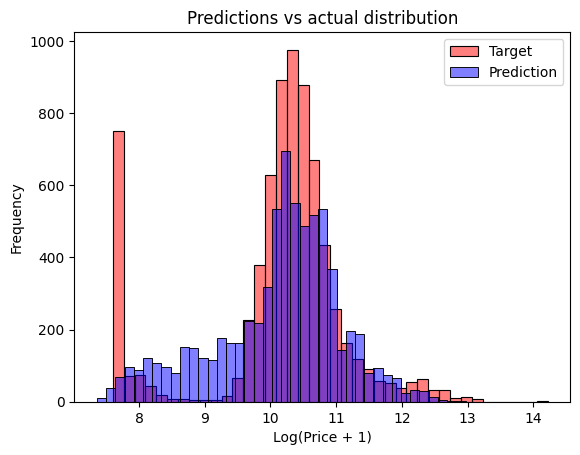

In [206]:
sns.histplot(y_train, label = "Target", bins = 40, color = "red", alpha = 0.5)
sns.histplot(y_pred, label = "Prediction", bins = 40, color = "blue", alpha = 0.5)
plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [203]:
len(y_train)

7150

In [185]:
x_train.shape

(7150, 6)

In [204]:
len(y_pred)

7150

In [186]:
w.shape

(5,)

In [ ]:
df.engine_fuel_type.unique()

In [ ]:
len_df = len(df)
print(len_df)

In [ ]:
n_val = int(0.2 * len_df)
n_test = int(0.2 * len_df)
n_train = len_df -(n_val + n_test)
print(n_train, n_val, n_test)

In [ ]:
df_val = df[:n_val]
df_test = df[n_val : n_val + n_test]
df_train = df[n_val + n_test :]
print(len(df_val), len(df_test), len(df_train))

In [ ]:
df.loc[[10, 0, 3, 5]]

In [ ]:
 df.loc[:2382]

In [ ]:
n_test = df.loc[n_val:n_val + n_test]

In [89]:
#implemetenting manual shuffling
idx = np.arange(len(df))
shuffled_idx = np.random.shuffle(idx)
shff_val = idx[:n_val]
shff_test = idx[n_val : n_val + n_test]
shff_train = idx[n_val + n_test :]
print(len(shff_val), len(shff_test), len(shff_train))



NameError: name 'n_val' is not defined

In [ ]:
idx

In [ ]:
#shuffling data
dfs_val = df.iloc[shff_val]
dfs_test = df.iloc[shff_test]
dfs_train = df.iloc[shff_train]


In [ ]:
dfs_val.iloc[0]

In [ ]:
dfs_val

In [ ]:
dfs_val.reset_index(drop = True)

In [ ]:
np.log1p(dfs_val['msrp'].values)

In [ ]:
y_val = np.log1p(dfs_val.msrp.values)
y_test = np.log1p(dfs_test.msrp.values)
y_train = np.log1p(dfs_train.msrp.values) 

In [ ]:
type(y_val)

In [ ]:
#manual linear regressiion
def linear_regression(Xi):
    pred = wo
    for i in range(len(Xi)):
        pred = pred + big[i] + Xi[i]
        print(w[i])
        print(Xi[i])
    return(pred)

In [ ]:
wo = 0
Xi = [2, 5, 20]
w = [1, 1, 1,]
big = [1, 5, 1,]

In [ ]:
linear_regression(Xi)

In [ ]:
np.exp(10)

In [ ]:
np.log(1000)

In [ ]:
np.exp(6.907755278982137)

In [ ]:
np.log1p(1000)

In [ ]:
np.expm1(6.90875477931522)